I'll start by making tools assuming we have a randomized control trial and that our `E[Y[0] | T=1] = E[Y[0] | T=0]`, a bold statement to be sure. (Check)

Then I'll make tools to verify the above, assuming we are in a randomized control trial setting. 

From there, we can begin to relax the assumptions of randomized control and move to a model based analysis.

In [46]:
data.head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


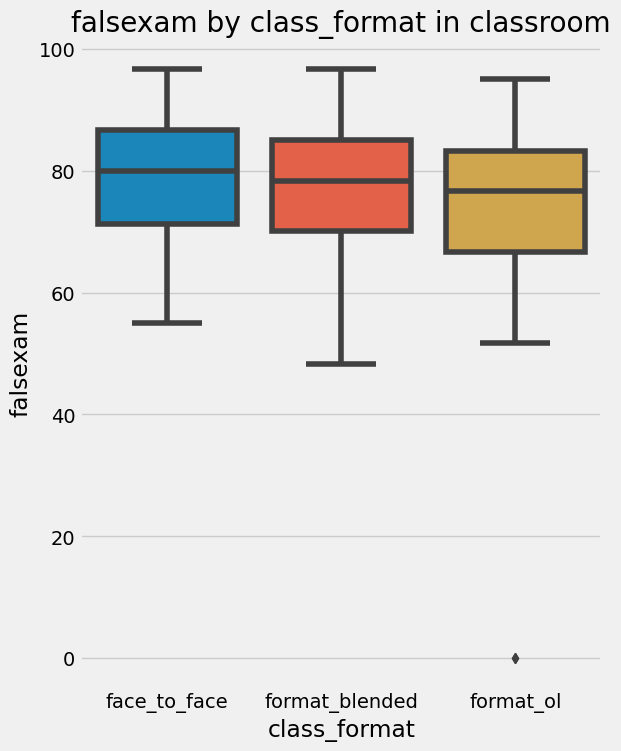

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
class_format,,,,,,,,,,
face_to_face,0.633333,0.202020,0.070707,0.000000,0.010101,0.000000,0.717172,0.0,0.0,78.547485
format_blended,0.550459,0.217949,0.102564,0.025641,0.012821,0.012821,0.628205,0.0,1.0,77.093731
format_ol,0.542553,0.228571,0.028571,0.014286,0.028571,0.000000,0.700000,1.0,0.0,73.635263


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

def plot_treatments_by_group(data, outcome, treatment, context):
    """
    Note: this function expects a single "treatment" column
    that should have all the categorical treatment variables.
    This column should either be strings or nominal numbers.
    
    Example with strings:
    >>> df
            outcome           treatment
        0  0.604729        no_treatment
        1 -0.057185  received_treatment
        2  0.533553        no_treatment
        3  0.552999  received_treatment
        4  0.992704  received_treatment
    Example with nominal numbers:
    >>> df
             outcome treatment
        0   2.150041         1
        1  11.392058         0
        2 -13.991566         0
        3 -16.072526         0
        4  -7.585248         1
    """
    plt.figure(figsize=(6,8))
    sns.boxplot(y=f"{outcome}", x=f"{treatment}", data=data).set_title(f'{outcome} by {treatment} in {context}')
    plt.show()
    
def treatment_groups_to_treatment_index(data, treatment_index_name, treatment_groups, default_group):
    return data.assign(**{
         f"{treatment_index_name}": np.select(
             [data[group].astype(bool) for group in treatment_groups],
             treatment_groups,
             default=f"{default_group}"
     )})

def recover_average_treatment_effect(data, treatment):
    return (
        data
        .groupby([treatment])
        .mean()
    )
            
data = pd.read_csv("online_classroom.csv")
data = treatment_groups_to_treatment_index(
    data, "class_format", ["format_ol", "format_blended"], "face_to_face"
)
plot_treatments_by_group(data, "falsexam", "class_format", "classroom")
recover_average_treatment_effect(data, "class_format")

# falsexam is the outcome variable 'Y', so we measure average treatment effect with respect to that

# utility functions to help you remember which test to run

1) a flow chart
2) a question and answer service
3) a print out with explanations along with definitions in "note" form
4) a link to the documentation upstream - aka this source information

Is categorical? Yes ->
 -> Pearson, McNemar's, Mantel-Maenszel
Two or more independent variables? Pearson
ordered? chi2 for trend - Mantel-Maenszel test
two dichotomous cat? Fisher
two paired proportions? McNemar's
more than two paired proportions? Cochran's Q test
source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4966396/

comparing categorical columns

comparing continuous columns



In [ ]:
# do implementations of each hypothesis test, start with a wrapping from scipy, unless necessary
# categorical_tests.definitions_and_explanations
# hypothesis_tests.categorical_tests.more_help
# hypothesis_tests.categorical_tests.[test_name]
# create a standardized interface
# also include consistent documentation within each hypothesis test
# also include online documentation with the above in the reference area

def categorical_hypothesis_testing_definitions_and_explanations():
    return """
    
    """

def categorical_hypothesis_testing_more_help():
    return """
    If the other documentation wasn't enough to help
    this make sense and you need more context, please check out:
    
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4966396/
    """



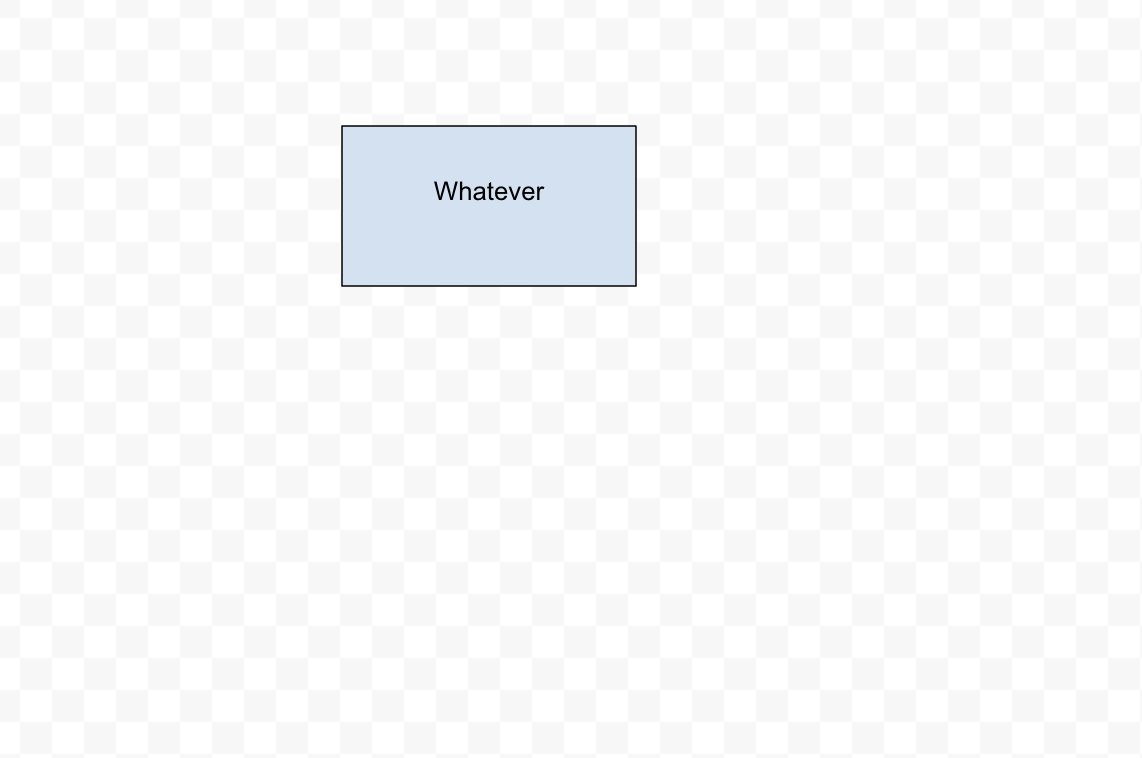

In [20]:
from PIL import Image
from IPython.display import Image
Image(filename='whatever.png') 

# img = Image.open("whatever.png")
# img.show()

In [58]:
import pandas
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

test_df = pandas.DataFrame([[2, 1], [1, 0], [0, 2], [0, 1], [0, 2]], columns=['var1', 'var2'])
chi2, p, dof, ex = chisq_of_df_cols(test_df, 'var1', 'var2')

chi2, p, dof, ex

(6.666666666666668,
 0.15458730450476033,
 4,
 array([[0.6, 0.2, 0.2],
        [1.2, 0.4, 0.4],
        [1.2, 0.4, 0.4]]))

In [60]:
chi2_contingency(pandas.crosstab(index=test_df['var1'],columns=test_df['var2']))

(6.666666666666668,
 0.15458730450476033,
 4,
 array([[0.6, 1.2, 1.2],
        [0.2, 0.4, 0.4],
        [0.2, 0.4, 0.4]]))

In [62]:
pandas.crosstab(index=test_df['var1'],columns=test_df['var2'])

var1,0,1,2
var2,,,
0,0,1,0
1,1,0,1
2,2,0,0


In [64]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import numpy as np

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

def chisq_of_df_cols2(df, c1, c2):
    ctsum = pandas.crosstab(index=test_df[c1],columns=test_df[c1])
    return(chi2_contingency(ctsum.fillna(0)))

one_times = []
two_times = []

for _ in range(10):
    for size in range(100, 500, 2):
        test_df = pd.DataFrame(
            np.random.randint(low=0, high=100000, size=size).reshape(size//2, 2),
            columns=["var1", "var2"]
        )
        start = time.time()
        chisq_of_df_cols(test_df, "var1", "var2")
        one_times.append(time.time() - start)
        
        start = time.time()
        chisq_of_df_cols2(test_df, "var1", "var2")
        two_times.append(time.time() - start)
        
print("means:")
print(np.mean(one_times))
print(np.mean(two_times))
print("std:")
print(np.std(one_times))
print(np.std(two_times))
print("medians:")
print(np.median(one_times))
print(np.median(two_times))
print("iqr:")
print(np.percentile(one_times, 75) - np.percentile(one_times, 25))
print(np.percentile(two_times, 75) - np.percentile(two_times, 25))

means:
0.0008240057229995728
0.007545123338699341
std:
0.00025279720610050366
0.0027707287936923654
medians:
0.0007855892181396484
0.007436513900756836
iqr:
0.00031453371047973633
0.004169464111328125


(array([39., 30., 29., 32., 22., 26., 33., 35., 37., 36., 25., 34., 29.,
        34., 29., 38., 27., 32., 27., 36., 34., 32., 31., 27., 19., 28.,
        33., 27., 30., 32., 31., 33., 31., 29., 30., 28., 30., 33., 22.,
        35., 30., 25., 30., 28., 30., 19., 29., 32., 27., 23., 22., 28.,
        37., 25., 32., 29., 27., 33., 34., 30., 26., 32., 28., 25., 27.,
        33., 17.,  3.,  2.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

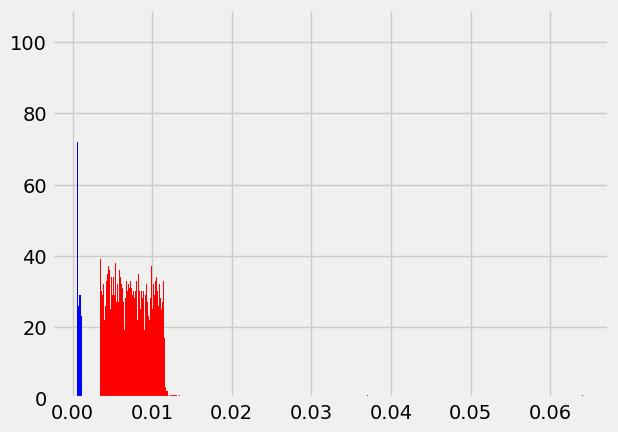

In [66]:
plt.hist(one_times, bins=len(one_times)//4, color="blue")
plt.hist(two_times, bins=len(one_times)//4, color="red")

In [114]:
[1,0,1,1,0],
[1,1,1,1,0]

df = pd.DataFrame()
df = df.append({
    "sex": 1, 
    "id": 1, 
}, ignore_index=True)
df = df.append({
    "sex": 0, 
    "hand": 1, 
}, ignore_index=True)
df = df.append({
    "sex": 1, 
    "hand": 1, 
}, ignore_index=True)
df = df.append({
    "sex": 0, 
    "hand": 1, 
}, ignore_index=True)
df = df.append({
    "sex": 1, 
    "hand": 0, 
}, ignore_index=True)
df = df.append({
    "sex": 1, 
    "hand": 0, 
}, ignore_index=True)
df = df.append({
    "sex": 0, 
    "hand": 1, 
}, ignore_index=True)
df = df.append({
    "sex": 0, 
    "hand": 0, 
}, ignore_index=True)


groupsizes = df.groupby(["sex", "hand"]).size()
contingency_table = groupsizes.unstack("sex")
print(contingency_table)
print(contingency_table.T)
col = contingency_table.columns.tolist()[0]
index = contingency_table.index[0]
contingency_table[index, 0:col].sum() + contingency_table[index, col+1:].sum()

sex   0  1
hand      
0.0   1  2
1.0   3  1
hand  0.0  1.0
sex           
0       1    3
1       2    1


/var/folders/md/1019n3qs2rbf117bss5m7qv80000gn/T/ipykernel_8050/2910121005.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/md/1019n3qs2rbf117bss5m7qv80000gn/T/ipykernel_8050/2910121005.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/md/1019n3qs2rbf117bss5m7qv80000gn/T/ipykernel_8050/2910121005.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/md/1019n3qs2rbf117bss5m7qv80000gn/T/ipykernel_8050/2910121005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/md/1019n3qs2rbf117bss5m7qv80000gn/T/ipykernel_8050/29

InvalidIndexError: (0.0, slice(0, 0, None))

In [84]:
print(df.head())

   A  B
0  1  1
1  0  1
2  1  1
3  0  1
4  1  0


In [79]:
df

,A,B
0,2,1
1,0,1
2,2,1
3,0,1
4,1,0


In [81]:
contingency_table

A,0,1,2
B,,,
0,NaN,1.0,NaN
1,2.0,NaN,2.0


In [88]:
contingency_table

A,0,1
B,,
0,1,2
1,2,2


In [87]:
contingency_table.columns

Int64Index([0, 1], dtype='int64', name='A')

In [133]:
arr = np.random.random(size=100).reshape(10, 10)

def trimean(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    median = np.median(data)
    return (q1 + 2*median + q3)/4

rows = arr.shape[0]
cols = arr.shape[1]

divisor = cols - 1
disagreement_arr = np.zeros(arr.shape)
for row in range(rows):
    for col in range(cols):
        if col == 0: 
            disagreement_arr[row, col] = abs(trimean(arr[row, 1:]) - arr[row, col])
        elif col == cols - 1:
            disagreement_arr[row, col] = abs(trimean(arr[row, :-1]) - arr[row, col])
        else:
            sub_array = np.concatenate([arr[row,:col], arr[1, col+1:]])
            disagreement_arr[row, col] = abs(trimean(sub_array) - arr[row, col])

In [145]:
# average disagreement per indentifier, 
# so if unique id refers to a person, disagreement across treatments per person
for col in range(disagreement_arr.shape[1]):
    print(disagreement_arr[:,col].mean())

0.2748976441229519
0.2669100041367492
0.22897825313202955
0.2678053973224429
0.2564774777613671
0.2384613410902595
0.3331111443475837
0.15739874096452122
0.28581816562296486
0.2792242131616127


array([0.23023699, 0.56490761, 0.6913797 , 0.16426576, 0.73182464,
       0.85502185, 0.73081478, 0.91519121, 0.05125012])

In [128]:
arr[1]

array([0.23023699, 0.56490761, 0.6913797 , 0.16426576, 0.73182464,
       0.59700703, 0.85502185, 0.73081478, 0.91519121, 0.05125012])

In [140]:
"""
                   20-30  40-50   60-70
    high school     50     1000    500 
    some college    10     2000    1500
    college         1      100     10000
    masters         0       10     10000
    phd             20      50     200

"""

death_educ = pd.DataFrame()
death_educ = death_educ.append({
    "20-30": 50,
    "40-50": 1000,
    "60-70": 500
}, ignore_index=True)
death_educ = death_educ.append({
    "20-30": 10,
    "40-50": 2000,
    "60-70": 1500
}, ignore_index=True)
death_educ = death_educ.append({
    "20-30": 1,
    "40-50": 100,
    "60-70": 10000
}, ignore_index=True)
death_educ = death_educ.append({
    "20-30": 0,
    "40-50": 10,
    "60-70": 10000
}, ignore_index=True)
death_educ = death_educ.append({
    "20-30": 20,
    "40-50": 50,
    "60-70": 200
}, ignore_index=True)

death_educ.index = ["high school", "some college", "college", "masters", "phd"]

/var/folders/md/1019n3qs2rbf117bss5m7qv80000gn/T/ipykernel_8050/3342753535.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  death_educ = death_educ.append({
/var/folders/md/1019n3qs2rbf117bss5m7qv80000gn/T/ipykernel_8050/3342753535.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  death_educ = death_educ.append({
/var/folders/md/1019n3qs2rbf117bss5m7qv80000gn/T/ipykernel_8050/3342753535.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  death_educ = death_educ.append({
/var/folders/md/1019n3qs2rbf117bss5m7qv80000gn/T/ipykernel_8050/3342753535.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  death_educ = death_educ.append({


In [156]:
death_educ

,20-30,40-50,60-70
high school,50,1000,500
some college,10,2000,1500
college,1,100,10000
masters,0,10,10000
phd,20,50,200


In [157]:
arr = death_educ.values
rows = arr.shape[0]
cols = arr.shape[1]

divisor = cols - 1
disagreement_arr = np.zeros(arr.shape)
for row in range(rows):
    for col in range(cols):
        if col == 0: 
            print(death_educ.columns[col], death_educ.index[row], arr[row, 1:], arr[row, col])
        elif col == cols - 1:
            print(death_educ.columns[col], death_educ.index[row],arr[row, :-1], arr[row, col])
        else:
            sub_array = np.concatenate([arr[row, :col], arr[row, col+1:]])
            print(death_educ.columns[col], death_educ.index[row],sub_array,  arr[row, col])

20-30 high school [1000  500] 50
40-50 high school [ 50 500] 1000
60-70 high school [  50 1000] 500
20-30 some college [2000 1500] 10
40-50 some college [  10 1500] 2000
60-70 some college [  10 2000] 1500
20-30 college [  100 10000] 1
40-50 college [    1 10000] 100
60-70 college [  1 100] 10000
20-30 masters [   10 10000] 0
40-50 masters [    0 10000] 10
60-70 masters [ 0 10] 10000
20-30 phd [ 50 200] 20
40-50 phd [ 20 200] 50
60-70 phd [20 50] 200


In [158]:
def get_marginal_disagreement(arr : np.array) -> np.array:
    rows = arr.shape[0]
    cols = arr.shape[1]

    divisor = cols - 1
    disagreement_arr = np.zeros(arr.shape)
    for row in range(rows):
        for col in range(cols):
            if col == 0: 
                disagreement_arr[row, col] = abs(trimean(arr[row, 1:]) - arr[row, col])
            elif col == cols - 1:
                disagreement_arr[row, col] = abs(trimean(arr[row, :-1]) - arr[row, col])
            else:
                sub_array = np.concatenate([arr[row,:col], arr[row, col+1:]])
                disagreement_arr[row, col] = abs(trimean(sub_array) - arr[row, col])
    return disagreement_arr

dis_arr = get_marginal_disagreement(death_educ.values)

In [161]:
cols = death_educ.columns.tolist()

for col in range(dis_arr.shape[1]):
    print(f"{cols[col]}", dis_arr[:, col].mean())

20-30 2519.8
40-50 2384.1
60-70 4125.9
